# Introduction to NLP Fundatmentals in TensorFlow

NLP has the goal of deriving information out of natural language

Another common term for NLP problem is seq2seq

## Check for GPU

In [246]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


## Downloading helper function inside the folder


! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [247]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going ti be using is Kaggle's introduction to NLP dataset. A classification problem

[Competition Link](https://www.kaggle.com/competitions/nlp-getting-started/overview)

In [248]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data('nlp_getting_started.zip')

--2024-03-13 00:15:09--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 

2404:6800:4009:822::201b, 2404:6800:4009:823::201b, 2404:6800:4009:827::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:822::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: 'nlp_getting_started.zip.1'

nlp_getting_started 100%[===================>] 593.11K   440KB/s    in 1.3s    

2024-03-13 00:15:12 (440 KB/s) - 'nlp_getting_started.zip.1' saved [607343/607343]



## Become one with the data

In [249]:
# Read thed data
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [250]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac= 1, random_state= 42)

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [251]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [252]:
# How many examples of each class
train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [253]:
# How may samples
len(train_df), len(test_df)

(7613, 3263)

In [254]:
# Let's visualise some random training examples
import random
random_index = random.randint(0, len(train_df) - 5)

for row in train_df_shuffled[['text', 'target']][random_index: random_index + 5].itertuples():
    _, text, target = row
    print(f"Target: {'Disaster' if target == 1 else 'Not a disaster'}")
    print(f"Text: {text}")
    print("----\n")


Target: Not a disaster
Text: --thus making @FemaleGilgamesh's assault useless.
The spears collided with the dark force however did not penetrate.

Due to the dark --
----

Target: Not a disaster
Text: @blazerfan not everyone can see ignoranceshe is Latinoand that is All she can ever benothing morebut an attack dog 4 a hate group GOP
----

Target: Not a disaster
Text: @BehindAShield @Wars_Goddess Sweet Lord.  (I collapse as my knees buckle)
----

Target: Not a disaster
Text: I See Fire
----

Target: Disaster
Text: Totoooooo! Totoooooooooo!
'@Historicalmages: Dust storm approaching Stratford Texas 18th April 1935. http://t.co/4awC16uUWB'
----



### Split data into training and validation sets

In [255]:
from sklearn.model_selection import train_test_split

# Use train_test_split() to split the trianing data into train and validation dataset

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(), train_df_shuffled['target'].to_numpy(), test_size= 0.1, random_state= 42)

In [256]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [257]:
# Check the first 10 sentences
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to nuumbers.

There are a few ways to do this:
* Tokenization
* Embedding

### Text vectorization (tokenization)

In [258]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use defalut TextVectorization parameter
text_vectorizer = TextVectorization(max_tokens= None, # how many words in vocab
                                    standardize= 'lower_and_strip_punctuation',
                                    split= 'whitespace',
                                    ngrams= None, # creates a group of words
                                    output_mode= 'int', # in which format the output should be
                                    output_sequence_length= None, # how long deos the output sequence should be of
                                    )

In [259]:
# Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences]) // len(train_sentences))

14

In [260]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocab
max_length = 15 # max length our sequences will be

text_vectorizer = TextVectorization(max_tokens= max_vocab_length,
                                    output_mode= 'int',
                                    output_sequence_length= max_length)

In [261]:
# Fit the text vectorization to training set
text_vectorizer.adapt(train_sentences)

In [262]:
# Create a sample sentence and tokenize it
sample_sentences = "There's a flood in my street!"

text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [263]:
# Choose a random sentences from the training sentences
random_sentences = random.choice(train_sentences)
print(f"Original text: {random_sentences}")
print(f"Vectorized sentence: {text_vectorizer([random_sentences])}")

Original text: It's Even Worse Than It Looks: How the American Constitutional System Collided With the New PoliticÛ_ http://t.co/Gfa3SOw9zn
Vectorized sentence: [[  37  151 1100   76   15  287   62    2  692    1 1584  321   14    2
    50]]


In [264]:
words_in_vocab = text_vectorizer.get_vocabulary() # retrieves all of the unique words

tope_5_words = words_in_vocab[:5] # gets the most common words
bottom_5_words = words_in_vocab[-5:] # gets the least common words

print(f"Number fo words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {tope_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number fo words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding layer

We're going to use Tensorflow Embedding layer.


The parameters we care most about our embedding layers:
* `input_dim`
* `output_dim`
* `input_length`

In [265]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length, # set input shape
                             output_dim= 128,
                             input_length= max_length # how long is each input
                             )

embedding

In [266]:
# Get a ranomd sentence from the training set
random_sentences = random.choice(train_sentences)

print(f"Original sentences: {random_sentences}")

# Embed the random sentences
sample_embde = embedding(text_vectorizer([random_sentences]))
sample_embde

Original sentences: My little heart just exploded #OTRAMETLIFE #MTVHottest One Direction https://t.co/pQsLUg4jK5


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04989978, -0.01775097,  0.03356976, ..., -0.01038712,
         -0.0316146 , -0.03220364],
        [ 0.04768486,  0.0047112 , -0.0386938 , ...,  0.03773645,
          0.00679364, -0.01465812],
        [ 0.00096428, -0.00575931,  0.00624223, ...,  0.03408844,
          0.02009357, -0.00168105],
        ...,
        [ 0.04954368,  0.04012064,  0.04073628, ...,  0.04012457,
         -0.02985697, -0.0302019 ],
        [ 0.04954368,  0.04012064,  0.04073628, ...,  0.04012457,
         -0.02985697, -0.0302019 ],
        [ 0.04954368,  0.04012064,  0.04073628, ...,  0.04012457,
         -0.02985697, -0.0302019 ]]], dtype=float32)>

In [267]:
# Check out a single token's embedding
sample_embde[0][0], sample_embde[0][0].shape, random_sentences[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 4.98997830e-02, -1.77509673e-02,  3.35697643e-02, -1.90079343e-02,
         1.49899609e-02,  3.31774615e-02, -1.28445737e-02,  4.63982858e-02,
        -1.58365145e-02,  1.40766390e-02, -3.78759131e-02,  1.34000219e-02,
         4.00660150e-02, -1.82518251e-02,  3.25854458e-02,  2.80438699e-02,
         3.59711684e-02,  2.57908218e-02, -7.04847649e-03, -2.60244850e-02,
         3.13857459e-02,  3.08411457e-02, -8.48039240e-03, -3.83788720e-02,
         1.91025250e-02,  2.47411020e-02,  3.34130265e-02, -4.75843064e-02,
        -3.57766375e-02, -1.51394717e-02, -3.98106948e-02, -1.46465525e-02,
        -2.68495213e-02,  1.26224421e-02,  3.50287296e-02,  1.10223778e-02,
        -4.15838137e-02,  2.11412832e-03,  3.95480655e-02, -2.52699144e-02,
         2.50042789e-02, -3.07913423e-02, -4.42328714e-02,  4.60444950e-02,
        -2.69825347e-02,  3.81029136e-02,  6.67316839e-03, -4.80281115e-02,
        -4.99750040e-02, -3.06967627e-0

## Modeling a text dataset

Experiments:

* Model 0: Naive Bayes
* Model 1: Feed-forward neural network
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: Tensorflow Hub pretrained fetaure extractor
* Model 7: Same as Model 6 but with 10% of the data

### Model 0: Getting a baseline

> **Note**: It is common practice to use non-DL algorithm as a baseline because of their speed and then alter using DL to see if you can improve upon them

In [268]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenizer and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert the text data into numerical form using tf-idf technique
    ("clf", MultinomialNB()) # classifier for the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [269]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves: {baseline_score * 100 :.2f}%")

Our baseline model achieves: 79.27%


In [270]:
# Make prediction
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [271]:
# Create an evaluation function to evaluate the model
# A function which returns a dictionary of accuracy, precision, recall and f1-score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def evaluation(y_true, y_pred):
    '''
    This function gives the evaluation of the classification model in a dictionary form (Accuracy, Precision, Recall and F1-score)

    Parameters:
        y_true: The true labels of the evaluation data
        y_pred: The predicted labels of the evaluation data

    Returns:
        A dictionary with keys: `accuracy`, `precision`, `recall`, `f1-score`
    '''

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred, average= 'weighted') # we are using weighted  average because the dataset is slightly imbalanced

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1score
    }

In [272]:
baseline_results = evaluation(y_true= val_labels, 
           y_pred= baseline_preds)

### Model 1: A Simple dense model

In [273]:
# Create directory to save tensorboard callback logs
SAVED_DIR = "model_logs"

In [274]:
# Build model with the Functiobnal API

inputs = layers.Input(shape= (1, ), dtype= tf.string)
x = text_vectorizer(inputs) # convert text to numbers
x = embedding(x) # convert numbers to matrix
x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_1 = tf.keras.Model(inputs, outputs, name= 'model_1_dense')

In [275]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glo  (None, 128)               0         
 balAveragePooling1D)                                            
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [276]:
# Compile the model
model_1.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

In [277]:
model_1_history = model_1.fit(x = train_sentences,
                              y= train_labels,
                              epochs= 5,
                              validation_data= (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20240313-001513
Epoch 1/5
215/215 [==============================] - 10s 42ms/step - loss: 0.6111 - accuracy: 0.6962 - val_loss: 0.5351 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4428 - accuracy: 0.8159 - val_loss: 0.4686 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3483 - accuracy: 0.8600 - val_loss: 0.4565 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2849 - accuracy: 0.8904 - val_loss: 0.4606 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2379 - accuracy: 0.9121 - val_loss: 0.4771 - val_accuracy: 0.7887


In [278]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.7887


[0.47714176774024963, 0.7887139320373535]

In [279]:
model_1_preds = model_1.predict(val_sentences)
model_1_preds.shape

24/24 [==============================] - 0s 6ms/step


(762, 1)

In [280]:
model_1_results = evaluation(y_true= val_labels,
           y_pred= tf.round(tf.squeeze(model_1_preds)))

In [281]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

## Visualizing learned embeddings

In [282]:
# Get the vocabulary from the text vectorization
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [283]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glo  (None, 128)               0         
 balAveragePooling1D)                                            
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

Now we've got the embedding matrix, let's see how to visualize it. To do so, Tensorflow has a handy tool called [projector](https://projector.tensorflow.org).

In [286]:
# Get the weight matrix of the embedding layer
embed_weights = model_1.get_layer('embedding_1').get_weights()
embed_weights[0].shape

(10000, 128)

In [287]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[0][index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

### Model 2: LSTM

LSTM = Long Short Term Memory

Architecture of the model:

```
Input(text) -> Tokenize -> Embedding -> Layers -> Output

```

In [288]:
# Create an LSTM Model
inputs = layers.Input(shape = (1, ), dtype= "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(units= 64, return_sequences= True, name= 'LSTM_layer_1')(x) # when stacking RNN cells together you need to set return_sequences = True 
# x = layers.LSTM(64, name= 'LSTM_layer_2')(x)
x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
x = layers.Dense(64, activation= 'relu', name= 'dense_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs, name= 'model_2_LSTM')

In [289]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 LSTM_layer_1 (LSTM)         (None, 15, 64)            49408     
                                                                 
 global_avg_pool_layer (Glo  (None, 64)                0         
 balAveragePooling1D)                                            
                                                                 
 dense_layer (Dense)         (None, 64)               

In [290]:
model_2.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

In [291]:
model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                              epochs= 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVED_DIR, 'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240313-001729
Epoch 1/5
215/215 [==============================] - 15s 57ms/step - loss: 0.2259 - accuracy: 0.9174 - val_loss: 0.6295 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1637 - accuracy: 0.9383 - val_loss: 0.6347 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1324 - accuracy: 0.9489 - val_loss: 0.6512 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1106 - accuracy: 0.9610 - val_loss: 0.7541 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0868 - accuracy: 0.9670 - val_loss: 0.8412 - val_accuracy: 0.7638


In [292]:
model_2_pred = model_2.predict(val_sentences)
model_2_pred[:10]

24/24 [==============================] - 1s 12ms/step


array([[0.12658313],
       [0.52278095],
       [0.9999987 ],
       [0.04635713],
       [0.00247164],
       [0.999663  ],
       [0.9942398 ],
       [0.99999976],
       [0.9999975 ],
       [0.4291104 ]], dtype=float32)

In [293]:
model_2_results = evaluation(y_true= val_labels,
                             y_pred= tf.squeeze(tf.round(model_2_pred)))
model_2_results

{'accuracy': 0.7637795275590551,
 'precision': 0.7658227848101266,
 'recall': 0.6954022988505747,
 'f1-score': 0.7624822674694383}

In [294]:
np.array(list(model_2_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit

In [295]:
# Build an RNN using the GRU cell
inputs = layers.Input(shape= (1, ), dtype= 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, name= 'GRU_layer_1')(x) # if you want to stack GRU cell return_sequences = True
# x = layers.LSTM(42, name= 'LSTM_layer_1', return_sequences= True)(x)
# x = layers.GRU(99, name= 'GRU_layer_2')(x)
# x = layers.Dense(64, activation= 'relu', name= 'dense_layer_1')(x)
# x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)
model_3 = tf.keras.Model(inputs, outputs, name= 'model_3_GRU')

In [296]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 GRU_layer_1 (GRU)           (None, 64)                37248     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [297]:
model_3.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

In [298]:
model_3_history = model_3.fit(x= train_sentences,
                                y= train_labels,
                                epochs= 5,
                                validation_data= (val_sentences, val_labels),
                                callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240313-001804
Epoch 1/5
215/215 [==============================] - 16s 62ms/step - loss: 0.1627 - accuracy: 0.9340 - val_loss: 0.6842 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0879 - accuracy: 0.9675 - val_loss: 0.9616 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0744 - accuracy: 0.9710 - val_loss: 0.9264 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0663 - accuracy: 0.9752 - val_loss: 1.0432 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0560 - accuracy: 0.9733 - val_loss: 1.3684 - val_accuracy: 0.7625


In [299]:
model_3_pred = model_3.predict(val_sentences)
model_3_pred

24/24 [==============================] - 1s 15ms/step


array([[9.59058118e-04],
       [8.49712729e-01],
       [9.99895215e-01],
       [2.26361789e-02],
       [6.16508405e-05],
       [9.99756753e-01],
       [9.90190387e-01],
       [9.99942780e-01],
       [9.99894500e-01],
       [9.89326596e-01],
       [1.93683532e-04],
       [9.93660629e-01],
       [1.30407570e-04],
       [9.40702632e-02],
       [4.50345033e-05],
       [2.79155851e-04],
       [1.54466601e-04],
       [2.04031094e-04],
       [9.71022807e-03],
       [9.99842286e-01],
       [9.99947309e-01],
       [3.30700423e-05],
       [9.98445570e-01],
       [7.52834021e-04],
       [9.99909520e-01],
       [9.99920368e-01],
       [2.72421486e-04],
       [2.21908616e-04],
       [2.06735451e-04],
       [8.01294267e-01],
       [9.99676585e-01],
       [2.05354925e-04],
       [2.39480357e-03],
       [9.14986362e-04],
       [9.16439533e-01],
       [3.91476721e-01],
       [9.99848127e-01],
       [1.67184785e-01],
       [5.21928864e-03],
       [9.99908328e-01],


In [300]:
model_3_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_3_pred)))
model_3_results

{'accuracy': 0.7624671916010499,
 'precision': 0.7755775577557755,
 'recall': 0.6752873563218391,
 'f1-score': 0.7603795119224996}

In [301]:
np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

### Model 4: Bidirectional RNN

In [302]:
# Create bidirectional model
inputs = layers.Input(shape= (1, ), dtype= 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences= True), name= 'birectional_LSTM_layer_1')(x)
x = layers.Bidirectional(layers.GRU(64), name= 'bidirectional_LSTM_layer_2')(x)
# x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_4 = tf.keras.Model(inputs, outputs, name= 'model_4_bidirectional')

In [303]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 birectional_LSTM_layer_1 (  (None, 15, 128)           98816     
 Bidirectional)                                                  
                                                                 
 bidirectional_LSTM_layer_2  (None, 128)               74496     
  (Bidirectional)                                                
                                             

In [304]:
model_4.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

In [305]:
model_4_history = model_4.fit(x= train_sentences,
            y= train_labels,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240313-001839
Epoch 1/5
215/215 [==============================] - 35s 115ms/step - loss: 0.1030 - accuracy: 0.9673 - val_loss: 1.0546 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 12s 55ms/step - loss: 0.0532 - accuracy: 0.9761 - val_loss: 1.3500 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0465 - accuracy: 0.9778 - val_loss: 1.4030 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0435 - accuracy: 0.9788 - val_loss: 1.2636 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0402 - accuracy: 0.9816 - val_loss: 1.6277 - val_accuracy: 0.7625


In [306]:
model_4_pred = model_4.predict(val_sentences)

24/24 [==============================] - 5s 62ms/step


In [307]:
model_4_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_4_pred)))
model_4_results

{'accuracy': 0.7624671916010499,
 'precision': 0.7992831541218638,
 'recall': 0.6408045977011494,
 'f1-score': 0.7585330817821493}

In [308]:
np.array(list(model_4_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

## CNN for Text and other types of sequences

We've used CNNs for image dataset which are 2D, however, our text data is 1D.

Previously for image we used Conv2D, but for text data we will use Conv1D

Architecture:
```
Input -> Tokenization -> Embedding -> CNN and Dense layers -> Output
```

### Model 5: 1D CNN

In [309]:
# Create the model
inputs = layers.Input(shape= (1, ), dtype= 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(64, 3, name= 'cnn_1d_layer_1')(x)
x = layers.MaxPool1D(name= 'max_pool_layer_1')(x)
x = layers.Conv1D(32, 3, name= 'cnn_1d_layer_2')(x)
x = layers.MaxPool1D(name= 'max_pool_layer_2')(x)
x = layers.GlobalAveragePooling1D(name= 'global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation= 'sigmoid', name= 'output_layer')(x)

model_5 = tf.keras.Model(inputs, outputs, name= 'model_5_cnn_1d')

In [310]:
model_5.summary()

Model: "model_5_cnn_1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 cnn_1d_layer_1 (Conv1D)     (None, 13, 64)            24640     
                                                                 
 max_pool_layer_1 (MaxPooli  (None, 6, 64)             0         
 ng1D)                                                           
                                                                 
 cnn_1d_layer_2 (Conv1D)     (None, 4, 32)          

In [311]:
model_5.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

In [312]:
model_5_history = model_5.fit(x = train_sentences,
                              y= train_labels,
                              epochs= 5,
                              validation_data= (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_5_cnn_1d')])

Saving TensorBoard log files to: model_logs/model_5_cnn_1d/20240313-001958
Epoch 1/5
215/215 [==============================] - 17s 68ms/step - loss: 0.1466 - accuracy: 0.9456 - val_loss: 0.8889 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 7s 30ms/step - loss: 0.0850 - accuracy: 0.9672 - val_loss: 0.9841 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0677 - accuracy: 0.9731 - val_loss: 1.2223 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0624 - accuracy: 0.9756 - val_loss: 1.1207 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0586 - accuracy: 0.9765 - val_loss: 1.1048 - val_accuracy: 0.7651


In [313]:
model_5_pred = model_5.predict(val_sentences)

24/24 [==============================] - 1s 12ms/step


In [314]:
model_5_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_5_pred)))

In [315]:
model_5_results

{'accuracy': 0.7650918635170604,
 'precision': 0.7537537537537538,
 'recall': 0.7212643678160919,
 'f1-score': 0.764594699542815}

In [316]:
np.array(list(model_5_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True, False])

### Model 6: Transfer learning

In [318]:
import tensorflow_hub as hub
embed = hub.load('https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2')

In [319]:
embed_samples = embed(["When you complete with the downloading of the model then you will look into the encodings of this sentence"])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.07687581  0.03288896  0.02179662 -0.04832654 -0.02299898 -0.00182735
 -0.03993054  0.08256393  0.01381563  0.03039743  0.01625713  0.02431568
  0.01514284  0.04843347  0.01244256  0.01343128  0.0023421  -0.02713761
 -0.00362572  0.00168669  0.01138663  0.0144208  -0.01719462 -0.03496176
 -0.07877127  0.04676209  0.03929747  0.02202034  0.01709515  0.0230419
  0.0915276  -0.03294362 -0.00317207 -0.04850543 -0.09554192  0.04421337
 -0.02980342  0.01039704 -0.0229306   0.06235658 -0.01796251 -0.02358888
 -0.02192312 -0.04135567  0.01966412  0.01150151 -0.0491185  -0.03221893
 -0.02000231 -0.04916013], shape=(50,), dtype=float32)


In [320]:
# Create Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2", 
                                        input_shape= [],
                                        dtype= 'string',
                                        trainable= False,
                                        name= 'use_layer')

In [321]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu', name= 'dense_layer_1'),
    layers.Dense(1, activation= 'sigmoid', name= 'output_layer')
], name= 'model_6_USE')

model_6.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 use_layer (KerasLayer)      (None, 512)               256797824 
                                                                 
 dense_layer_1 (Dense)       (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [322]:
model_6_history = model_6.fit(x= train_sentences,
            y= train_labels,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20240313-002122
Epoch 1/5
215/215 [==============================] - 70s 308ms/step - loss: 0.4938 - accuracy: 0.7848 - val_loss: 0.4554 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 40s 188ms/step - loss: 0.4165 - accuracy: 0.8120 - val_loss: 0.4494 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 39s 182ms/step - loss: 0.4064 - accuracy: 0.8238 - val_loss: 0.4438 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 36s 167ms/step - loss: 0.4024 - accuracy: 0.8243 - val_loss: 0.4446 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 30s 138ms/step - loss: 0.3998 - accuracy: 0.8241 - val_loss: 0.4411 - val_accuracy: 0.8176


In [323]:
model_6_pred = model_6.predict(val_sentences)

24/24 [==============================] - 19s 582ms/step


In [324]:
model_6_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_6_pred)))
model_6_results

{'accuracy': 0.8175853018372703,
 'precision': 0.8235294117647058,
 'recall': 0.764367816091954,
 'f1-score': 0.8168602489629228}

In [325]:
np.array(list(model_6_results.values())) > np.array(list(baseline_results.values()))

array([ True, False,  True,  True])

### Model 7: TF hub pretrained USE but with 10% of training data

Transfer learning helps alot when you don't have a large dataset.

Let's replicate `model_6` with only 10% of the training data

In [326]:
# Create subsets of 10% of the training data
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [327]:
train_sentences_10_percent[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [328]:
model_7 = tf.keras.models.clone_model(model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 use_layer (KerasLayer)      (None, 512)               256797824 
                                                                 
 dense_layer_1 (Dense)       (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [329]:
model_7.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.legacy.Adam(),
                metrics= ['accuracy'])

In [330]:
model_7_history = model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback(SAVED_DIR, 'model_7_10_percent')])

Saving TensorBoard log files to: model_logs/model_7_10_percent/20240313-002524
Epoch 1/5
22/22 [==============================] - 41s 2s/step - loss: 0.6514 - accuracy: 0.7182 - val_loss: 0.6152 - val_accuracy: 0.7690
Epoch 2/5
22/22 [==============================] - 17s 787ms/step - loss: 0.5643 - accuracy: 0.8058 - val_loss: 0.5607 - val_accuracy: 0.7677
Epoch 3/5
22/22 [==============================] - 15s 710ms/step - loss: 0.4978 - accuracy: 0.8190 - val_loss: 0.5165 - val_accuracy: 0.7795
Epoch 4/5
22/22 [==============================] - 17s 794ms/step - loss: 0.4476 - accuracy: 0.8336 - val_loss: 0.4969 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 14s 634ms/step - loss: 0.4150 - accuracy: 0.8409 - val_loss: 0.4886 - val_accuracy: 0.7795


In [331]:
model_7_pred = model_7.predict(val_sentences)

24/24 [==============================] - 20s 773ms/step


In [332]:
model_7_results = evaluation(val_labels,
                             tf.squeeze(tf.round(model_7_pred)))
model_7_results

{'accuracy': 0.7795275590551181,
 'precision': 0.7903225806451613,
 'recall': 0.7040229885057471,
 'f1-score': 0.777998488727556}

In [333]:
np.array(list(model_7_results)) > np.array(list(baseline_results))

array([False, False, False, False])

## Comparing the performance of each of our models

In [337]:
# Combine model results into a DataFrame

all_model_results = pd.DataFrame({
                                    "Baseline": baseline_results,
                                    "Feed Forward": model_1_results,
                                    "LSTM": model_2_results,
                                    "GRU": model_3_results,
                                    "Bidirectional": model_4_results,
                                    "1DCNN": model_5_results,
                                    "USE Pretrained model": model_6_results,
                                    "10% training data": model_7_results
                                })
all_model_results = all_model_results.transpose()

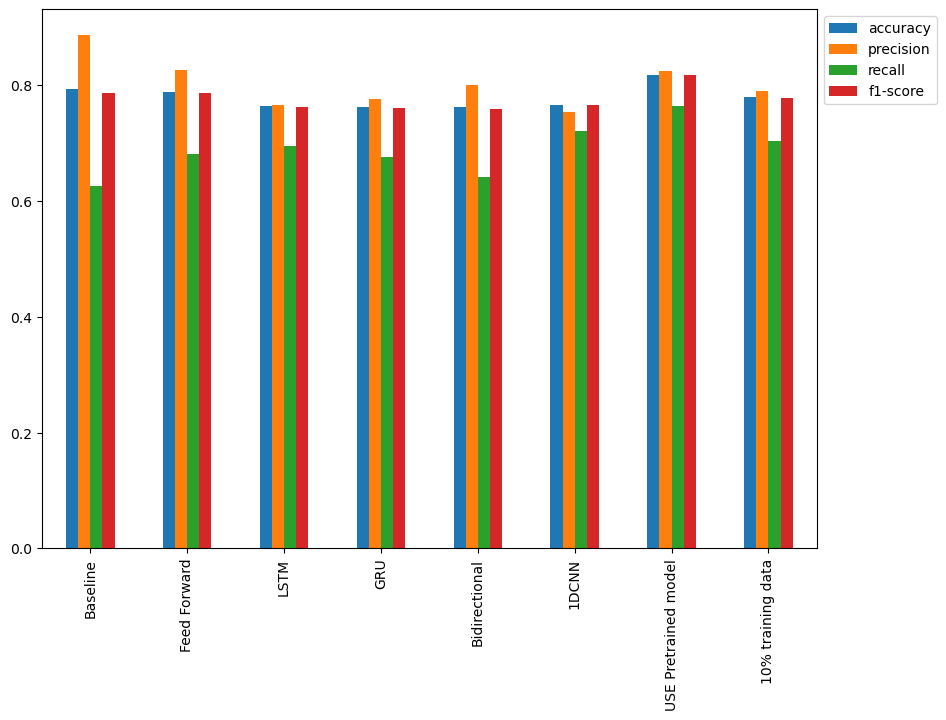

In [338]:
# Plot and compare all of the model results
all_model_results.plot(kind= 'bar', figsize= (10, 7)).legend(bbox_to_anchor= (1.0, 1.0))

<Axes: >

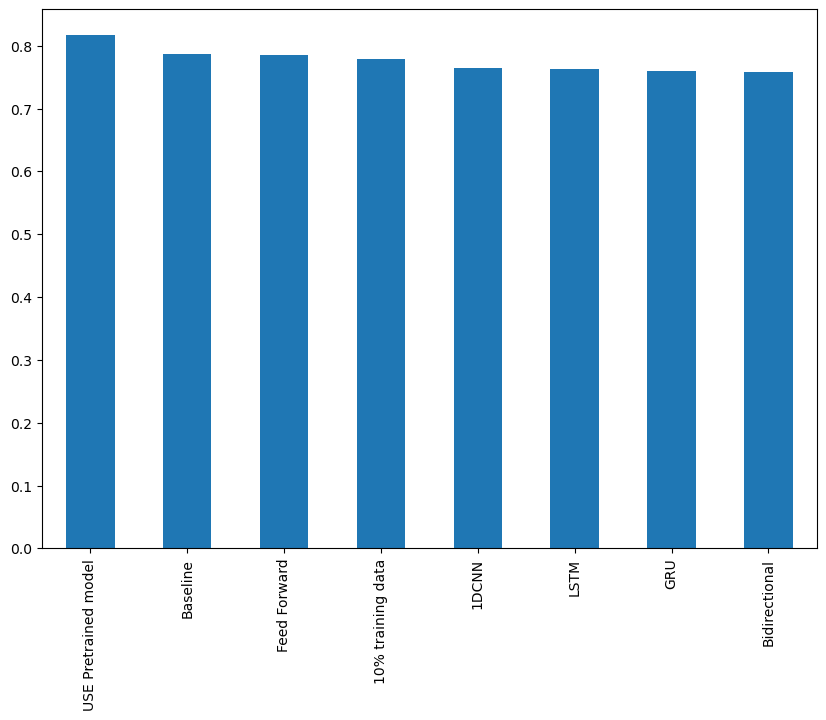

In [340]:
# Sort model results by f1-score
all_model_results.sort_values('f1-score', ascending= False)['f1-score'].plot(kind= 'bar', figsize= (10, 7))

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:
1. `HDF5`
2. `SavedModel`